In [27]:
%matplotlib inline

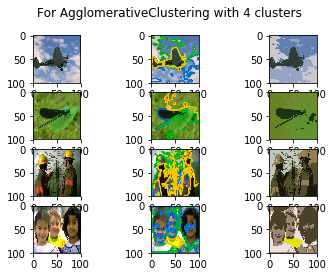

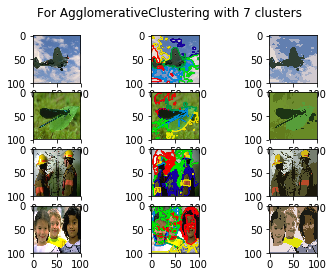

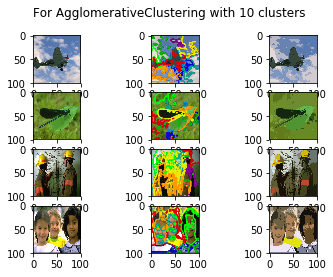

In [7]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np
import cv2


images = ["3063.jpg", "35070.jpg", "23084.jpg", "368037.jpg"]

new_size = (100, 100)
temp = np.arange(1, new_size[0] + 1, dtype=np.int32)
x_mesh, y_mesh = np.meshgrid(temp, temp)
mesh = np.stack((x_mesh, y_mesh), axis=-1)
reshaped_mesh = mesh.reshape((-1, 2))

for no_of_clusters in [4, 7, 10]:
    plt.figure()
    plt.suptitle("For AgglomerativeClustering with " + str(no_of_clusters) + " clusters")
    image_ind = 0
    for image_name in images:
        img = cv2.imread(image_name)
        resized_img = cv2.resize(img, new_size)
        reshaped_img = resized_img.reshape((-1, 3))

        X = np.empty((reshaped_img.shape[0], 5), dtype=np.int64)
        for i in range(reshaped_img.shape[0]):
            X[i] = np.concatenate((reshaped_img[i], reshaped_mesh[i]))
        
        ac = AgglomerativeClustering(n_clusters=no_of_clusters)
        res = ac.fit_predict(X)

        val = np.zeros((no_of_clusters, 3), dtype=np.int64)
        cnt = np.zeros(no_of_clusters)
        for i in range(reshaped_img.shape[0]):
            val[res[i]] += reshaped_img[i]
            cnt[res[i]] += 1

        for i in range(no_of_clusters):
            val[i] = val[i] // cnt[i]

        final_res = np.empty((res.shape[0], 3), dtype=np.uint8)
        for i in range(res.shape[0]):
            final_res[i] = val[res[i]]

        final_res = final_res.reshape((new_size[0], new_size[1], 3))
        res = res.reshape(new_size)

        plt.subplot(len(images), 3, 3 * image_ind + 1)
        plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
        plt.subplot(len(images), 3, 3 * image_ind + 2)
        plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
        for i in range(no_of_clusters):
            plt.contour(res == i, colors=[plt.cm.nipy_spectral(i / float(no_of_clusters))], linewidths=0.5)
        plt.subplot(len(images), 3, 3 * image_ind + 3)
        plt.imshow(cv2.cvtColor(final_res, cv2.COLOR_BGR2RGB))
        image_ind += 1

    plt.savefig("AglomerativeClustering_" + str(no_of_clusters) + "clusters.jpg")
    plt.show()

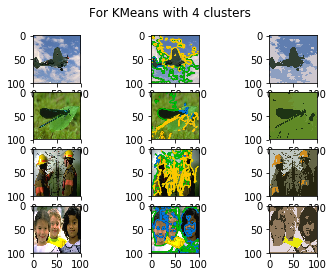

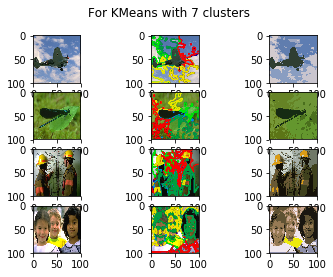

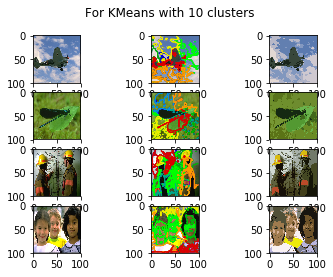

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2


images = ["3063.jpg", "35070.jpg", "23084.jpg", "368037.jpg"]

new_size = (100, 100)
temp = np.arange(1, new_size[0] + 1, dtype=np.int32)
x_mesh, y_mesh = np.meshgrid(temp, temp)
mesh = np.stack((x_mesh, y_mesh), axis=-1)
reshaped_mesh = mesh.reshape((-1, 2))

for no_of_clusters in [4, 7, 10]:
    plt.figure()
    plt.suptitle("For KMeans with " + str(no_of_clusters) + " clusters")
    image_ind = 0
    for image_name in images:
        img = cv2.imread(image_name)
        resized_img = cv2.resize(img, new_size)
        reshaped_img = resized_img.reshape((-1, 3))

        X = np.empty((reshaped_img.shape[0], 5), dtype=np.int64)
        for i in range(reshaped_img.shape[0]):
            X[i] = np.concatenate((reshaped_img[i], reshaped_mesh[i]))
        
        kmeans = KMeans(n_clusters=no_of_clusters)
        res = kmeans.fit_predict(X)

        val = np.zeros((no_of_clusters, 3), dtype=np.int64)
        cnt = np.zeros(no_of_clusters)
        for i in range(reshaped_img.shape[0]):
            val[res[i]] += reshaped_img[i]
            cnt[res[i]] += 1

        for i in range(no_of_clusters):
            val[i] = val[i] // cnt[i]

        final_res = np.empty((res.shape[0], 3), dtype=np.uint8)
        for i in range(res.shape[0]):
            final_res[i] = val[res[i]]

        final_res = final_res.reshape((new_size[0], new_size[1], 3))
        res = res.reshape(new_size)

        plt.subplot(len(images), 3, 3 * image_ind + 1)
        plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
        plt.subplot(len(images), 3, 3 * image_ind + 2)
        plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
        for i in range(no_of_clusters):
            plt.contour(res == i, colors=[plt.cm.nipy_spectral(i / float(no_of_clusters))], linewidths=0.5)
        plt.subplot(len(images), 3, 3 * image_ind + 3)
        plt.imshow(cv2.cvtColor(final_res, cv2.COLOR_BGR2RGB))
        image_ind += 1

    plt.savefig("KMeans_" + str(no_of_clusters) + "clusters.jpg")
    plt.show()

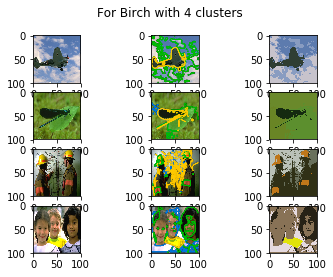

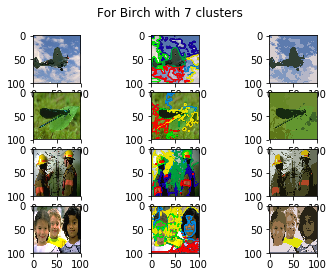

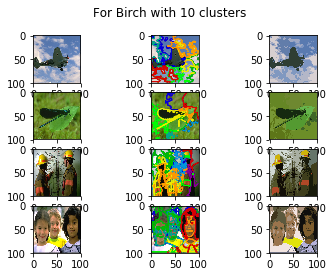

In [10]:
from sklearn.cluster import Birch
import matplotlib.pyplot as plt
import numpy as np
import cv2


images = ["3063.jpg", "35070.jpg", "23084.jpg", "368037.jpg"]

new_size = (100, 100)
temp = np.arange(1, new_size[0] + 1, dtype=np.int32)
x_mesh, y_mesh = np.meshgrid(temp, temp)
mesh = np.stack((x_mesh, y_mesh), axis=-1)
reshaped_mesh = mesh.reshape((-1, 2))

for no_of_clusters in [4, 7, 10]:
    plt.figure()
    plt.suptitle("For Birch with " + str(no_of_clusters) + " clusters")
    image_ind = 0
    for image_name in images:
        img = cv2.imread(image_name)
        resized_img = cv2.resize(img, new_size)
        reshaped_img = resized_img.reshape((-1, 3))

        X = np.empty((reshaped_img.shape[0], 5), dtype=np.int64)
        for i in range(reshaped_img.shape[0]):
            X[i] = np.concatenate((reshaped_img[i], reshaped_mesh[i]))
        
        bch = Birch(threshold=0.5, branching_factor=50, n_clusters=no_of_clusters, copy=True, compute_labels=True)
        res = bch.fit_predict(X)

        val = np.zeros((no_of_clusters, 3), dtype=np.int64)
        cnt = np.zeros(no_of_clusters)
        for i in range(reshaped_img.shape[0]):
            val[res[i]] += reshaped_img[i]
            cnt[res[i]] += 1

        for i in range(no_of_clusters):
            val[i] = val[i] // cnt[i]

        final_res = np.empty((res.shape[0], 3), dtype=np.uint8)
        for i in range(res.shape[0]):
            final_res[i] = val[res[i]]

        final_res = final_res.reshape((new_size[0], new_size[1], 3))
        res = res.reshape(new_size)

        plt.subplot(len(images), 3, 3 * image_ind + 1)
        plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
        plt.subplot(len(images), 3, 3 * image_ind + 2)
        plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
        for i in range(no_of_clusters):
            plt.contour(res == i, colors=[plt.cm.nipy_spectral(i / float(no_of_clusters))], linewidths=0.5)
        plt.subplot(len(images), 3, 3 * image_ind + 3)
        plt.imshow(cv2.cvtColor(final_res, cv2.COLOR_BGR2RGB))
        image_ind += 1

    plt.savefig("Birch_" + str(no_of_clusters) + "clusters.jpg")
    plt.show()

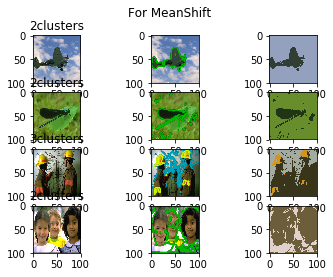

In [12]:
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
import numpy as np
import cv2


images = ["3063.jpg", "35070.jpg", "23084.jpg", "368037.jpg"]

new_size = (100, 100)
temp = np.arange(1, new_size[0] + 1, dtype=np.int32)
x_mesh, y_mesh = np.meshgrid(temp, temp)
mesh = np.stack((x_mesh, y_mesh), axis=-1)
reshaped_mesh = mesh.reshape((-1, 2))

plt.suptitle("For MeanShift")
image_ind = 0
for image_name in images:
    img = cv2.imread(image_name)
    resized_img = cv2.resize(img, new_size)
    reshaped_img = resized_img.reshape((-1, 3))

    X = np.empty((reshaped_img.shape[0], 5), dtype=np.int64)
    for i in range(reshaped_img.shape[0]):
        X[i] = np.concatenate((reshaped_img[i], reshaped_mesh[i]))

    ms = MeanShift()
    res = ms.fit_predict(X)
    no_of_clusters = max(res) + 1

    val = np.zeros((no_of_clusters, 3), dtype=np.int64)
    cnt = np.zeros(no_of_clusters)
    for i in range(reshaped_img.shape[0]):
        val[res[i]] += reshaped_img[i]
        cnt[res[i]] += 1

    for i in range(no_of_clusters):
        val[i] = val[i] // cnt[i]

    final_res = np.empty((res.shape[0], 3), dtype=np.uint8)
    for i in range(res.shape[0]):
        final_res[i] = val[res[i]]

    final_res = final_res.reshape((new_size[0], new_size[1], 3))
    res = res.reshape(new_size)

    plt.subplot(len(images), 3, 3 * image_ind + 1)
    plt.gca().set_title(str(no_of_clusters) + "clusters")
    plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
    plt.subplot(len(images), 3, 3 * image_ind + 2)
    plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
    for i in range(no_of_clusters):
        plt.contour(res == i, colors=[plt.cm.nipy_spectral(i / float(no_of_clusters))], linewidths=0.5)
    plt.subplot(len(images), 3, 3 * image_ind + 3)
    plt.imshow(cv2.cvtColor(final_res, cv2.COLOR_BGR2RGB))
    image_ind += 1

plt.savefig("MeanShift.jpg")
plt.show()

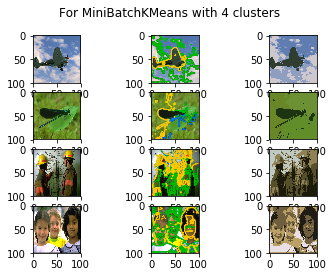

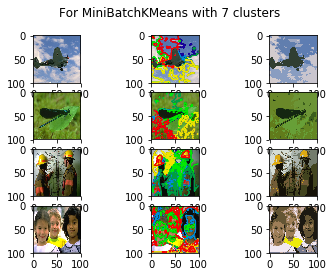

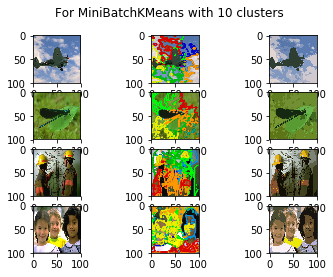

In [13]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2


images = ["3063.jpg", "35070.jpg", "23084.jpg", "368037.jpg"]

new_size = (100, 100)
temp = np.arange(1, new_size[0] + 1, dtype=np.int32)
x_mesh, y_mesh = np.meshgrid(temp, temp)
mesh = np.stack((x_mesh, y_mesh), axis=-1)
reshaped_mesh = mesh.reshape((-1, 2))

for no_of_clusters in [4, 7, 10]:
    plt.figure()
    plt.suptitle("For MiniBatchKMeans with " + str(no_of_clusters) + " clusters")
    image_ind = 0
    for image_name in images:
        img = cv2.imread(image_name)
        resized_img = cv2.resize(img, new_size)
        reshaped_img = resized_img.reshape((-1, 3))

        X = np.empty((reshaped_img.shape[0], 5), dtype=np.int64)
        for i in range(reshaped_img.shape[0]):
            X[i] = np.concatenate((reshaped_img[i], reshaped_mesh[i]))
        
        mbkm = MiniBatchKMeans(n_clusters=no_of_clusters, max_iter=600)
        res = mbkm.fit_predict(X)

        val = np.zeros((no_of_clusters, 3), dtype=np.int64)
        cnt = np.zeros(no_of_clusters)
        for i in range(reshaped_img.shape[0]):
            val[res[i]] += reshaped_img[i]
            cnt[res[i]] += 1

        for i in range(no_of_clusters):
            val[i] = val[i] // cnt[i]

        final_res = np.empty((res.shape[0], 3), dtype=np.uint8)
        for i in range(res.shape[0]):
            final_res[i] = val[res[i]]

        final_res = final_res.reshape((new_size[0], new_size[1], 3))
        res = res.reshape(new_size)

        plt.subplot(len(images), 3, 3 * image_ind + 1)
        plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
        plt.subplot(len(images), 3, 3 * image_ind + 2)
        plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
        for i in range(no_of_clusters):
            plt.contour(res == i, colors=[plt.cm.nipy_spectral(i / float(no_of_clusters))], linewidths=0.5)
        plt.subplot(len(images), 3, 3 * image_ind + 3)
        plt.imshow(cv2.cvtColor(final_res, cv2.COLOR_BGR2RGB))
        image_ind += 1

    plt.savefig("MiniBatchKMeans_" + str(no_of_clusters) + "clusters.jpg")
    plt.show()

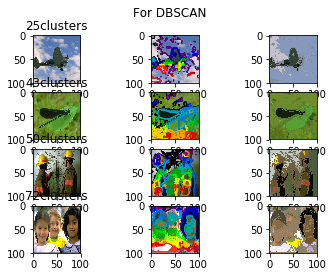

In [22]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np
import cv2


images = ["3063.jpg", "35070.jpg", "23084.jpg", "368037.jpg"]

new_size = (100, 100)
temp = np.arange(1, new_size[0] + 1, dtype=np.int32)
x_mesh, y_mesh = np.meshgrid(temp, temp)
mesh = np.stack((x_mesh, y_mesh), axis=-1)
reshaped_mesh = mesh.reshape((-1, 2))

plt.suptitle("For DBSCAN with epsilon=8.0 and min_samples=10")
image_ind = 0
for image_name in images:
    img = cv2.imread(image_name)
    resized_img = cv2.resize(img, new_size)
    reshaped_img = resized_img.reshape((-1, 3))

    X = np.empty((reshaped_img.shape[0], 5), dtype=np.int64)
    for i in range(reshaped_img.shape[0]):
        X[i] = np.concatenate((reshaped_img[i], reshaped_mesh[i]))

    ds = DBSCAN(eps=8.0, min_samples=10)
    res = ds.fit_predict(X)
    no_of_clusters = max(res) + 1

    val = np.zeros((no_of_clusters, 3), dtype=np.int64)
    cnt = np.zeros(no_of_clusters)
    for i in range(reshaped_img.shape[0]):
        val[res[i]] += reshaped_img[i]
        cnt[res[i]] += 1

    for i in range(no_of_clusters):
        val[i] = val[i] // cnt[i]

    final_res = np.empty((res.shape[0], 3), dtype=np.uint8)
    for i in range(res.shape[0]):
        final_res[i] = val[res[i]]

    final_res = final_res.reshape((new_size[0], new_size[1], 3))
    res = res.reshape(new_size)

    plt.subplot(len(images), 3, 3 * image_ind + 1)
    plt.gca().set_title(str(no_of_clusters) + "clusters")
    plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
    plt.subplot(len(images), 3, 3 * image_ind + 2)
    plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
    for i in range(no_of_clusters):
        plt.contour(res == i, colors=[plt.cm.nipy_spectral(i / float(no_of_clusters))], linewidths=0.5)
    plt.subplot(len(images), 3, 3 * image_ind + 3)
    plt.imshow(cv2.cvtColor(final_res, cv2.COLOR_BGR2RGB))
    image_ind += 1

plt.savefig("DBSCAN.jpg")
plt.show()

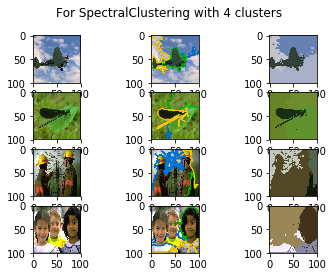

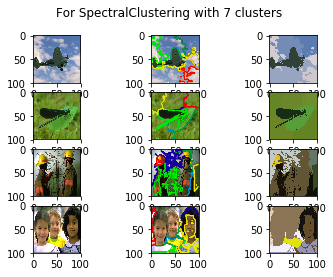

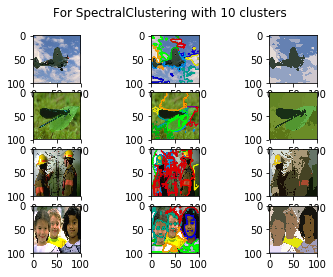

In [29]:
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
import numpy as np
import cv2


images = ["3063.jpg", "35070.jpg", "23084.jpg", "368037.jpg"]

new_size = (100, 100)
temp = np.arange(1, new_size[0] + 1, dtype=np.int32)
x_mesh, y_mesh = np.meshgrid(temp, temp)
mesh = np.stack((x_mesh, y_mesh), axis=-1)
reshaped_mesh = mesh.reshape((-1, 2))

for no_of_clusters in [4, 7, 10]:
    plt.figure()
    plt.suptitle("For SpectralClustering with " + str(no_of_clusters) + " clusters")
    image_ind = 0
    for image_name in images:
        img = cv2.imread(image_name)
        resized_img = cv2.resize(img, new_size)
        reshaped_img = resized_img.reshape((-1, 3))

        X = np.empty((reshaped_img.shape[0], 5), dtype=np.int64)
        for i in range(reshaped_img.shape[0]):
            X[i] = np.concatenate((reshaped_img[i], reshaped_mesh[i]))
        
        sc = SpectralClustering(n_clusters=no_of_clusters, affinity='nearest_neighbors', n_neighbors=10)
        res = sc.fit_predict(X)

        val = np.zeros((no_of_clusters, 3), dtype=np.int64)
        cnt = np.zeros(no_of_clusters)
        for i in range(reshaped_img.shape[0]):
            val[res[i]] += reshaped_img[i]
            cnt[res[i]] += 1

        for i in range(no_of_clusters):
            val[i] = val[i] // cnt[i]

        final_res = np.empty((res.shape[0], 3), dtype=np.uint8)
        for i in range(res.shape[0]):
            final_res[i] = val[res[i]]

        final_res = final_res.reshape((new_size[0], new_size[1], 3))
        res = res.reshape(new_size)

        plt.subplot(len(images), 3, 3 * image_ind + 1)
        plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
        plt.subplot(len(images), 3, 3 * image_ind + 2)
        plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
        for i in range(no_of_clusters):
            plt.contour(res == i, colors=[plt.cm.nipy_spectral(i / float(no_of_clusters))], linewidths=0.5)
        plt.subplot(len(images), 3, 3 * image_ind + 3)
        plt.imshow(cv2.cvtColor(final_res, cv2.COLOR_BGR2RGB))
        image_ind += 1

    plt.savefig("SpectralClustering_" + str(no_of_clusters) + "clusters.jpg")
    plt.show()